In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
prev_path = "\\".join(list(os.getcwd().split('\\')[0:-1]))
if module_path not in sys.path: sys.path.append(prev_path)

from models.unsupervised.pca import PcaHandler
import warnings
warnings.filterwarnings('ignore')

read in data

In [6]:
#import eikon as ek
# I tried ok :S

df = pd.read_csv(os.path.join(prev_path, "models", "data", 'snp.csv'), index_col=0)
df_returns = np.log(df).diff()
df_returns.index = [dt.datetime.strptime(str(x).split(" ")[0], "%Y-%m-%d").date() for x in list(df_returns.index)]
df_results = df_returns.shift(-1)
df_results = df_results[1:-1]
df_results = df_results.drop('^GSPC', axis=1)

In [7]:
df_results

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2017-01-04,-0.011961,-0.017497,-0.000698,0.005072,0.007556,-0.011643,0.008601,-0.010225,-0.015104,0.016854,...,0.012767,0.000000,-0.015019,-0.013114,-0.009170,0.003305,0.006404,-0.026547,-0.016343,-0.003332
2017-01-05,0.030681,0.006949,-0.013177,0.011087,0.000313,0.013296,0.026841,0.009879,0.011328,0.022315,...,0.010769,0.002937,-0.000565,-0.000686,-0.007034,0.012025,0.000095,0.014176,0.006477,0.003147
2017-01-06,0.003121,0.018652,-0.000590,0.009118,0.006563,0.007987,-0.000981,-0.014561,-0.011241,0.002490,...,0.003456,-0.015267,-0.016635,0.003083,-0.004245,0.002790,0.019250,0.000116,-0.010896,-0.002777
2017-01-09,-0.000831,0.029303,0.002298,0.001008,-0.002183,-0.007633,0.013410,0.012709,0.000522,-0.002859,...,0.022178,-0.000249,-0.012835,-0.005144,-0.004670,0.005865,0.060471,-0.006184,0.015267,-0.000371
2017-01-10,0.023627,0.003295,0.020446,0.005359,-0.036770,-0.039679,0.001340,0.000579,0.009171,0.006720,...,-0.020239,0.009879,0.010189,-0.008979,0.005277,-0.002942,0.009456,-0.005281,0.008231,-0.011563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,0.001475,0.011872,0.008410,-0.002802,-0.001042,0.004362,0.001388,0.008397,0.005011,0.005719,...,-0.006421,0.012770,0.026101,0.011057,-0.000729,0.000621,0.001106,0.002864,0.003515,0.005021
2022-12-23,0.002142,-0.014263,0.012071,-0.013976,-0.000675,-0.005958,0.003599,0.003779,-0.002936,-0.009977,...,0.043751,0.008982,0.013798,0.007512,0.008982,0.007728,0.004646,0.011137,0.008017,-0.003161
2022-12-27,-0.009811,-0.016902,0.001929,-0.031166,-0.004674,-0.009752,-0.006839,-0.016163,-0.008289,-0.020380,...,-0.051587,-0.007229,-0.016563,-0.034579,-0.016207,-0.004552,-0.010187,-0.016713,-0.017974,-0.010169
2022-12-28,0.020055,0.030378,0.006927,0.027931,0.002032,-0.007858,0.022739,0.008114,0.019794,0.027783,...,0.014503,0.007060,0.007537,0.045149,0.024482,0.005245,0.014499,0.042396,0.022876,0.029593


In [8]:
mod = PcaHandler(data=df_results)

plot the explained variances per factor

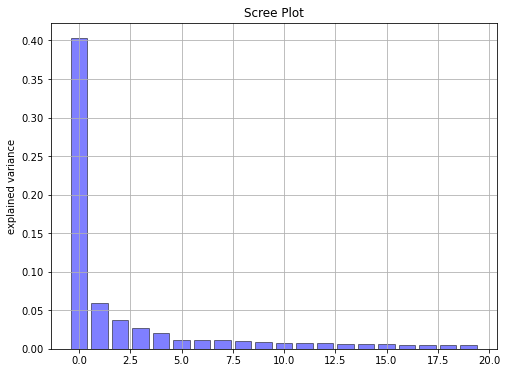

In [11]:
mod.plot(20)

extract pca factors (it automatically extracts the best one first)

In [13]:
mod.components(3)

array([[-0.08628869, -0.02076105, -0.01326904],
       [ 0.06079143, -0.05236396,  0.01416573],
       [-0.10382292, -0.04812418,  0.0789694 ],
       ...,
       [-0.32008366, -0.0184383 ,  0.01145544],
       [ 0.39324837, -0.12689171,  0.05386317],
       [-0.07708891,  0.0735767 ,  0.07496086]])

In [15]:
np.cov(mod.components(3).T)

array([[9.65296925e-02, 5.86716401e-16, 5.89368560e-19],
       [5.86716401e-16, 1.44088107e-02, 3.68355350e-19],
       [5.89368560e-19, 3.68355350e-19, 8.92897205e-03]])